In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

In [3]:
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
df = df.drop(['url', 'timedelta'], axis = 1)

In [5]:
df['class'] = df['shares'].apply(lambda x:1 if x > 1400 else 0)
df['class']

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Name: class, Length: 39644, dtype: int64

In [6]:
df = df.drop(['shares'], axis = 1)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,class
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.feature_selection import RFECV

from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score,roc_auc_score, roc_curve, auc

In [8]:
# function for scaling the data
def std_data(x):
    sc = StandardScaler()
    scaled = sc.fit_transform(x)
    return scaled

In [9]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [10]:
X_scaled = std_data(X)
X_scaled

array([[ 0.75744723, -0.69521045,  0.03277187, ..., -0.97543219,
        -1.81071884,  0.13891975],
       [-0.66165665, -0.61879381,  0.01605588, ..., -0.26907618,
         0.83774863, -0.68965812],
       [-0.66165665, -0.71219192,  0.00764453, ..., -0.26907618,
         0.83774863, -0.68965812],
       ...,
       [-0.18862202, -0.2218518 , -0.00904959, ...,  0.24463729,
        -1.56994907, -0.08705603],
       [-2.08076053,  0.28759248, -0.00247749, ..., -0.26907618,
         0.83774863, -0.68965812],
       [-0.18862202, -0.82681689,  0.04367671, ...,  0.67273184,
        -0.92789635,  0.41511238]])

In [11]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,...,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,...,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,...,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,...,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,...,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.284413,-0.425630,-0.005443,0.000675,-0.001346,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,...,-0.191635,0.063865,-0.027151,-0.003726,0.075594,-0.183490,-0.562396,-0.269076,0.308055,-0.689658
39640,0.757447,-0.463838,0.042060,0.000675,0.059999,-0.166229,0.961420,-0.185832,11.380809,-0.169058,...,0.200881,0.573773,-0.228941,0.379044,0.420082,0.078642,0.054425,3.498156,-0.751332,3.729424
39641,-0.188622,-0.221852,-0.009050,0.000675,-0.013798,1.157470,-0.594963,0.897288,-0.060829,0.626110,...,-0.445302,0.573773,-1.036100,-0.758786,-0.957871,-0.620377,0.531059,0.244637,-1.569949,-0.087056
39642,-2.080761,0.287592,-0.002477,0.000675,0.001068,-0.077983,-0.594963,-0.426526,-0.304268,0.505491,...,-1.118934,-0.461978,-1.036100,0.424968,0.075594,0.996104,-0.870807,-0.269076,0.837749,-0.689658


In [12]:
def model_compare(algo, X_train, X_test, y_train, y_test):
    algo.fit(X_train, y_train)
    
    y_pred_train = algo.predict(X_train)
    y_pred_test = algo.predict(X_test)
    
    y_prob_train = algo.predict_proba(X_train)[:,1]
    y_prob_test = algo.predict_proba(X_test)[:,1]
    
    print('Accuracy on Train Set: \n', accuracy_score(y_train, y_pred_train))
    print('\n')
    print('Accuracy on Test Set: \n', accuracy_score(y_test, y_pred_test))
    print('\n')
    
    print('Confusion Matrix for Train Set:\n', confusion_matrix(y_train, y_pred_train))
    print('\n')
    print('Confusion Matrix for Test Set:\n', confusion_matrix(y_test, y_pred_test))
    print('\n')
    
    print('Classification Report for Train Set:\n', classification_report(y_train, y_pred_train))
    print('\n')
    print('Classification Report for Test Set:\n', classification_report(y_test, y_pred_test))
    print('\n')
    
    print('ROC AUC on Train Set:\n', roc_auc_score(y_train, y_prob_train))
    print('\n')
    print('ROC AUC on Test Set:\n', roc_auc_score(y_test, y_prob_test))
    print('\n')
    
    print('ROC AUC Curve for Train Set:')
    print('\n')
    fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r-')
    plt.show()
    print('\n')
    
    print('ROC AUC Curve for Test Set:')
    print('\n')
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r-')
    plt.show()
    print('\n')

In [13]:
X = X_scaled
y = df['class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
dt = DecisionTreeClassifier()

## First Desicion Tree Base model With all Features

Accuracy on Train Set: 
 1.0


Accuracy on Test Set: 
 0.5802925844963848


Confusion Matrix for Train Set:
 [[14010     0]
 [    0 13740]]


Confusion Matrix for Test Set:
 [[3532 2540]
 [2452 3370]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14010
           1       1.00      1.00      1.00     13740

    accuracy                           1.00     27750
   macro avg       1.00      1.00      1.00     27750
weighted avg       1.00      1.00      1.00     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59      6072
           1       0.57      0.58      0.57      5822

    accuracy                           0.58     11894
   macro avg       0.58      0.58      0.58     11894
weighted avg       0.58      0.58      0.58     11894



ROC AUC on Train Set:
 1.0


ROC AUC on Test Set:
 0.58026265824

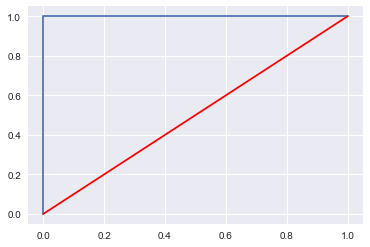



ROC AUC Curve for Test Set:




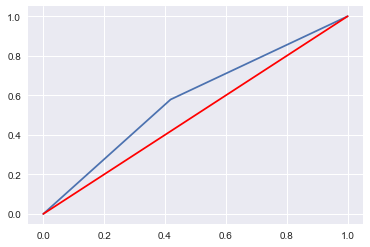

In [16]:
model_compare(dt, X_train, X_test, y_train, y_test)

## Hyperparameter Tunning with all features for Decision Tree

In [17]:
dtrscvall = DecisionTreeClassifier(random_state = 0)

params = {'max_depth': sp_randint(3,5),
         'min_samples_split': sp_randint(2,7),
         'min_samples_leaf': sp_randint(2,5),
         'criterion': ['gini', 'entropy']}

rand_search = RandomizedSearchCV(dtrscvall, param_distributions = params, cv = 5, random_state = 1)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


Accuracy on Train Set: 
 0.6381261261261262


Accuracy on Test Set: 
 0.6298133512695476


Confusion Matrix for Train Set:
 [[9666 4344]
 [5698 8042]]


Confusion Matrix for Test Set:
 [[4143 1929]
 [2474 3348]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66     14010
           1       0.65      0.59      0.62     13740

    accuracy                           0.64     27750
   macro avg       0.64      0.64      0.64     27750
weighted avg       0.64      0.64      0.64     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65      6072
           1       0.63      0.58      0.60      5822

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894



ROC AUC on Train Set:
 0.6763240438572157


ROC AUC o

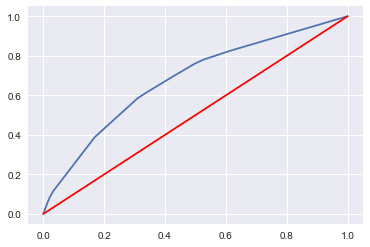



ROC AUC Curve for Test Set:




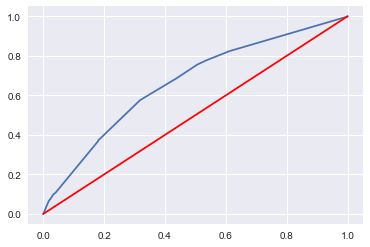

In [18]:
dtrscvall = DecisionTreeClassifier(**rand_search.best_params_)

model_compare(dtrscvall, X_train, X_test, y_train, y_test)

1: For first try with these params {'max_depth': sp_randint(3,58),
         'min_samples_split': sp_randint(2,50),
         'min_samples_leaf': sp_randint(2,50),
         'criterion': ['gini', 'entropy']} we get this best parameters like {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 47, 'min_samples_split': 8} and based on that we get roc auc score on train and test is 75 & 67 which is clearly overfitting so we have tune it.

2: For second try with these params = {'max_depth': sp_randint(3,50),
         'min_samples_split': sp_randint(2,47),
         'min_samples_leaf': sp_randint(2,48),
         'criterion': ['gini', 'entropy']} we get this best parameters like {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 47, 'min_samples_split': 8} but we get same roc auc score as of the above which is 75 & 67.

3: For third try with these params =  {'max_depth': sp_randint(3,45),
         'min_samples_split': sp_randint(2,43),
         'min_samples_leaf': sp_randint(2,42),
         'criterion': ['gini', 'entropy']} we get the best parameters like and based on that we get the roc auc score on train and test is 74 & 64.

4: For fourth try with these params = {'max_depth': sp_randint(3,35),
         'min_samples_split': sp_randint(2,37),
         'min_samples_leaf': sp_randint(2,30),
         'criterion': ['gini', 'entropy']} we get this best parameters like {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 8} and based on that we get the roc auc score on train and test is 77 & 66.

5: For fifth try with these params = {'max_depth': sp_randint(3,25),
         'min_samples_split': sp_randint(2,30),
         'min_samples_leaf': sp_randint(2,20),
         'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 11, 'min_samples_split': 19} and based on that we get the roc auc score on train and test is 72 & 68.

6: For sixth try with this params = {'max_depth': sp_randint(3,15),
         'min_samples_split': sp_randint(2,17),
         'min_samples_leaf': sp_randint(2,13),
         'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 15}and based on that we get the roc auc score on train and test is 65 & 64 which is good enough because is not overfitting. 

7: For seventh try with these params = {'max_depth': sp_randint(3,10),
         'min_samples_split': sp_randint(2,12),
         'min_samples_leaf': sp_randint(2,9),
         'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 10} and based on that we get the roc auc score on train and test is 70 & 67 which is slightly overfiting but it is considerable for final modelling.

8: For eight try with this params = {'max_depth': sp_randint(3,5),
         'min_samples_split': sp_randint(2,7),
         'min_samples_leaf': sp_randint(2,5),
         'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} and based on that we get the roc auc score on train and test is 67 & 66.

So for decision tree with all features we consider 6, 7 and 8th model.

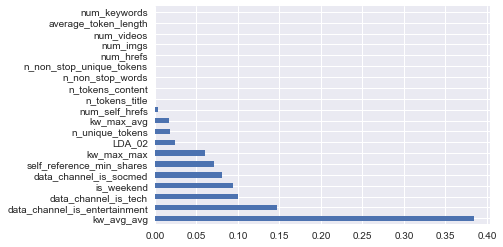

In [19]:
feat_importances_dt = pd.Series(dtrscvall.feature_importances_, index=X.columns)
feat_importances_dt.nlargest(20).plot(kind='barh')
plt.show()

In [20]:
# Reorder by importance
feat_importances_dt = feat_importances_dt.sort_values(ascending = False)

# Converting to Data Frame
important_features_dt = feat_importances_dt.to_frame()

# First 20 Important Features
important_features_dt[0:20].index

Index(['kw_avg_avg', 'data_channel_is_entertainment', 'data_channel_is_tech',
       'is_weekend', 'data_channel_is_socmed', 'self_reference_min_shares',
       'kw_max_max', 'LDA_02', 'n_unique_tokens', 'kw_max_avg',
       'num_self_hrefs', 'n_tokens_content', 'kw_min_avg', 'kw_avg_max',
       'kw_min_max', 'kw_avg_min', 'kw_max_min', 'kw_min_min', 'num_hrefs',
       'data_channel_is_world'],
      dtype='object')

## Feature Selection and Hyperparameter tunning with Decision Tree

In [21]:
# Reorder by importance
feat_importances_dt = feat_importances_dt.sort_values(ascending = False)

In [22]:
# Converting to Data Frame
important_features_dt = feat_importances_dt.to_frame()

In [23]:
# First 20 Important Features
important_features_dt[0:20].index

Index(['kw_avg_avg', 'data_channel_is_entertainment', 'data_channel_is_tech',
       'is_weekend', 'data_channel_is_socmed', 'self_reference_min_shares',
       'kw_max_max', 'LDA_02', 'n_unique_tokens', 'kw_max_avg',
       'num_self_hrefs', 'data_channel_is_world', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle', 'n_non_stop_unique_tokens',
       'data_channel_is_bus', 'self_reference_max_shares', 'n_non_stop_words',
       'kw_avg_max'],
      dtype='object')

## Decision Tree with 20 most important features

In [24]:
X = X_scaled[['kw_avg_avg', 'data_channel_is_entertainment', 'data_channel_is_tech',
       'is_weekend', 'data_channel_is_socmed', 'self_reference_min_shares',
       'kw_max_max', 'LDA_02', 'n_unique_tokens', 'kw_max_avg',
       'num_self_hrefs', 'n_tokens_content', 'kw_min_avg', 'kw_avg_max',
       'kw_min_max', 'kw_avg_min', 'kw_max_min', 'kw_min_min', 'num_hrefs',
       'data_channel_is_world']]

y = df['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
dtrscv20 = DecisionTreeClassifier(random_state = 0)

params = {'max_depth': sp_randint(2,7), 
          'min_samples_split': sp_randint(2,5), 
          'min_samples_leaf': sp_randint(2,5), 
          'criterion': ['gini', 'entropy']}

rand_search = RandomizedSearchCV(dtrscv20, param_distributions = params, cv = 5, random_state = 1)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 4}


Accuracy on Train Set: 
 0.6548468468468468


Accuracy on Test Set: 
 0.6363712796367916


Confusion Matrix for Train Set:
 [[8903 5107]
 [4471 9269]]


Confusion Matrix for Test Set:
 [[3750 2322]
 [2003 3819]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65     14010
           1       0.64      0.67      0.66     13740

    accuracy                           0.65     27750
   macro avg       0.66      0.66      0.65     27750
weighted avg       0.66      0.65      0.65     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.65      0.62      0.63      6072
           1       0.62      0.66      0.64      5822

    accuracy                           0.64     11894
   macro avg       0.64      0.64      0.64     11894
weighted avg       0.64      0.64      0.64     11894



ROC AUC on Train Set:
 0.7063580391215674


ROC AUC o

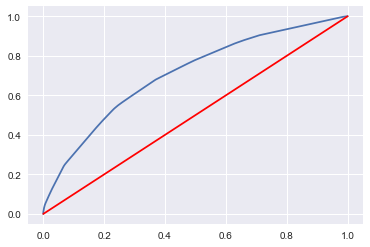



ROC AUC Curve for Test Set:




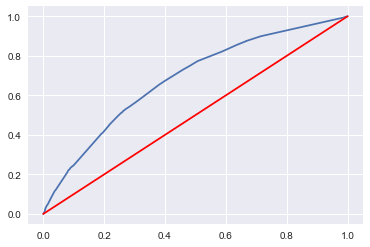

In [27]:
dtrscv20 = DecisionTreeClassifier(**rand_search.best_params_)

model_compare(dtrscv20, X_train, X_test, y_train, y_test)

1: For first try with based on these params = {'max_depth': sp_randint(3,7), 
          'min_samples_split': sp_randint(2,8), 
          'min_samples_leaf': sp_randint(2,9), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3} and based on that we get roc auc score on train  and test are 70 & 67 which is good enough but we ahve to try for more tunning so that our model improves. 

2: For second try based on these params = {'max_depth': sp_randint(3,20), 
          'min_samples_split': sp_randint(2,17), 
          'min_samples_leaf': sp_randint(2,15), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3} and based on that we get roc auc score of 65 & 64.

3: For third try based on these params = {'max_depth': sp_randint(3,10), 
          'min_samples_split': sp_randint(2,9), 
          'min_samples_leaf': sp_randint(2,8), 
          'criterion': ['gini', 'entropy']} we get the bet parameters like {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2} and based on that we get roc auc score on train and test is 70 & 67 respectively.

4: For fourth try based on these params = {'max_depth': sp_randint(3,10), 
          'min_samples_split': sp_randint(2,10), 
          'min_samples_leaf': sp_randint(2,7), 
          'criterion': ['gini', 'entropy']}
        we get the best parameters like {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}and based on that we get roc auc score on train and test is 70 & 67.

5: For fifth try based on these params = {'max_depth': sp_randint(2,7), 
          'min_samples_split': sp_randint(2,5), 
          'min_samples_leaf': sp_randint(2,5), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 4} and based on that we get the roc auc score on train and test of 70 & 68 parameters.
    

So for decision tree with best 20 features we will go with 5, 1 and 2 model.

## Decision Tree with 30 important features with Tunning

In [28]:
# First 30 Important Features
important_features_dt[0:30].index

Index(['kw_avg_avg', 'data_channel_is_entertainment', 'data_channel_is_tech',
       'is_weekend', 'data_channel_is_socmed', 'self_reference_min_shares',
       'kw_max_max', 'LDA_02', 'n_unique_tokens', 'kw_max_avg',
       'num_self_hrefs', 'data_channel_is_world', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle', 'n_non_stop_unique_tokens',
       'data_channel_is_bus', 'self_reference_max_shares', 'n_non_stop_words',
       'kw_avg_max', 'num_hrefs', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'weekday_is_tuesday', 'kw_min_avg', 'n_tokens_content',
       'num_videos', 'n_tokens_title'],
      dtype='object')

In [29]:
X = X_scaled[['kw_avg_avg', 'data_channel_is_entertainment', 'data_channel_is_tech',
       'is_weekend', 'data_channel_is_socmed', 'self_reference_min_shares',
       'kw_max_max', 'LDA_02', 'n_unique_tokens', 'kw_max_avg',
       'num_self_hrefs', 'n_tokens_content', 'kw_min_avg', 'kw_avg_max',
       'kw_min_max', 'kw_avg_min', 'kw_max_min', 'kw_min_min', 'num_hrefs',
       'data_channel_is_world', 'n_non_stop_words',
       'self_reference_max_shares', 'data_channel_is_bus',
       'n_non_stop_unique_tokens', 'data_channel_is_lifestyle', 'num_keywords',
       'average_token_length', 'num_videos', 'num_imgs',
       'abs_title_sentiment_polarity']]

y = df['class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [31]:
dtrscv30 = DecisionTreeClassifier(random_state = 0)

params = {'max_depth': sp_randint(3,7), 
          'min_samples_split': sp_randint(2,5), 
          'min_samples_leaf': sp_randint(2,5), 
          'criterion': ['gini', 'entropy']}

rand_search = RandomizedSearchCV(dtrscv30, param_distributions = params, cv = 5, random_state = 1)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


Accuracy on Train Set: 
 0.6381261261261262


Accuracy on Test Set: 
 0.6298133512695476


Confusion Matrix for Train Set:
 [[9666 4344]
 [5698 8042]]


Confusion Matrix for Test Set:
 [[4143 1929]
 [2474 3348]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66     14010
           1       0.65      0.59      0.62     13740

    accuracy                           0.64     27750
   macro avg       0.64      0.64      0.64     27750
weighted avg       0.64      0.64      0.64     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65      6072
           1       0.63      0.58      0.60      5822

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894



ROC AUC on Train Set:
 0.6763240438572157


ROC AUC o

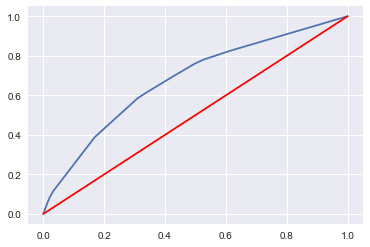



ROC AUC Curve for Test Set:




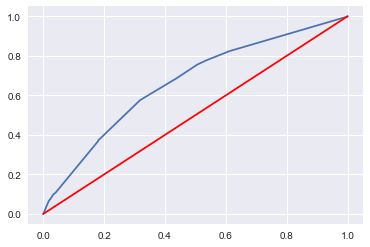

In [32]:
dtrscv30 = DecisionTreeClassifier(**rand_search.best_params_)

model_compare(dtrscv30, X_train, X_test, y_train, y_test)

1: For first try based on these params = {'max_depth': sp_randint(3,30), 
          'min_samples_split': sp_randint(2,27), 
          'min_samples_leaf': sp_randint(2,25), 
          'criterion': ['gini', 'entropy']} we get best parameters like {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 18, 'min_samples_split': 3} based on that we get roc auc score on train and test is 65 & 64 respectively.

2: For second try based on these params = {'max_depth': sp_randint(3,27), 
          'min_samples_split': sp_randint(2,25), 
          'min_samples_leaf': sp_randint(2,23), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 18, 'min_samples_split': 3} and based on that we get the roc auc score on train and test is 65 & 64.

3: For third try based on these params = {'max_depth': sp_randint(3,25), 
          'min_samples_split': sp_randint(2,22), 
          'min_samples_leaf': sp_randint(2,20), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 18, 'min_samples_split': 3} and based on that we get the roc auc score on train and test is 65 & 64 respectively.

4: For fourth try based on these params = {'max_depth': sp_randint(3,20), 
          'min_samples_split': sp_randint(2,17), 
          'min_samples_leaf': sp_randint(2,19), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 14} based on that we get the roc auc score on train and test is 67 & 66.

5: For fifth try based on these params {'max_depth': sp_randint(3,15), 
          'min_samples_split': sp_randint(2,13), 
          'min_samples_leaf': sp_randint(2,11), 
          'criterion': ['gini', 'entropy']}
 we get the best parameters like {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 11} and based on that we get roc auc score on train and test is 65 & 64.

6: For sixth try based on these params = {'max_depth': sp_randint(3,13), 
          'min_samples_split': sp_randint(2,10), 
          'min_samples_leaf': sp_randint(2,9), 
          'criterion': ['gini', 'entropy']}
 we get the best parameters like {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6} and based on that we get the roc auc score on train and test is 67 & 66.

7: For seventh try based on these params = {'max_depth': sp_randint(3,10), 
          'min_samples_split': sp_randint(2,7), 
          'min_samples_leaf': sp_randint(2,7), 
          'criterion': ['gini', 'entropy']}
 we get the best parameters like {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2} and based on that we get the same roc auc score on train and test is 67 & 66.

8: For eight try based on these params = {'max_depth': sp_randint(3,7), 
          'min_samples_split': sp_randint(2,5), 
          'min_samples_leaf': sp_randint(2,5), 
          'criterion': ['gini', 'entropy']}
    we get the best parameters like {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2} and based on that we get the same roc auc score on train and test is 67 & 66.

So for the decision tree with 30 important features we will go with models like 5, 7, & 8.

## Decision Tree with 40 important features with tunning

In [33]:
# First 40 Important Features
important_features_dt[0:40].index

Index(['kw_avg_avg', 'data_channel_is_entertainment', 'data_channel_is_tech',
       'is_weekend', 'data_channel_is_socmed', 'self_reference_min_shares',
       'kw_max_max', 'LDA_02', 'n_unique_tokens', 'kw_max_avg',
       'num_self_hrefs', 'data_channel_is_world', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle', 'n_non_stop_unique_tokens',
       'data_channel_is_bus', 'self_reference_max_shares', 'n_non_stop_words',
       'kw_avg_max', 'num_hrefs', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'weekday_is_tuesday', 'kw_min_avg', 'n_tokens_content',
       'num_videos', 'n_tokens_title', 'abs_title_sentiment_polarity',
       'self_reference_avg_sharess', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'LDA_00', 'LDA_01', 'LDA_03'],
      dtype='object')

In [34]:
X = X_scaled[['kw_avg_avg', 'data_channel_is_entertainment', 'data_channel_is_tech',
       'is_weekend', 'data_channel_is_socmed', 'self_reference_min_shares',
       'kw_max_max', 'LDA_02', 'n_unique_tokens', 'kw_max_avg',
       'num_self_hrefs', 'n_tokens_content', 'kw_min_avg', 'kw_avg_max',
       'kw_min_max', 'kw_avg_min', 'kw_max_min', 'kw_min_min', 'num_hrefs',
       'data_channel_is_world', 'n_non_stop_words',
       'self_reference_max_shares', 'data_channel_is_bus',
       'n_non_stop_unique_tokens', 'data_channel_is_lifestyle', 'num_keywords',
       'average_token_length', 'num_videos', 'num_imgs',
       'abs_title_sentiment_polarity', 'self_reference_avg_sharess',
       'abs_title_subjectivity', 'global_rate_positive_words',
       'title_sentiment_polarity', 'title_subjectivity',
       'max_negative_polarity', 'min_negative_polarity',
       'avg_negative_polarity', 'max_positive_polarity',
       'min_positive_polarity']]

y = df['class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
dtrscv40 = DecisionTreeClassifier(random_state = 0)

params = {'max_depth': sp_randint(3,5), 
          'min_samples_split': sp_randint(2,4), 
          'min_samples_leaf': sp_randint(2,5), 
          'criterion': ['gini', 'entropy']}

rand_search = RandomizedSearchCV(dtrscv40, param_distributions = params, cv = 5, random_state = 1)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}


Accuracy on Train Set: 
 0.6289729729729729


Accuracy on Test Set: 
 0.6242643349588027


Confusion Matrix for Train Set:
 [[9298 4712]
 [5584 8156]]


Confusion Matrix for Test Set:
 [[3992 2080]
 [2389 3433]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64     14010
           1       0.63      0.59      0.61     13740

    accuracy                           0.63     27750
   macro avg       0.63      0.63      0.63     27750
weighted avg       0.63      0.63      0.63     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.63      0.66      0.64      6072
           1       0.62      0.59      0.61      5822

    accuracy                           0.62     11894
   macro avg       0.62      0.62      0.62     11894
weighted avg       0.62      0.62      0.62     11894



ROC AUC on Train Set:
 0.658213820030816


ROC AUC on

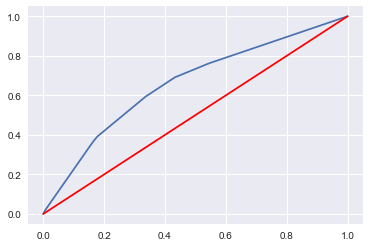



ROC AUC Curve for Test Set:




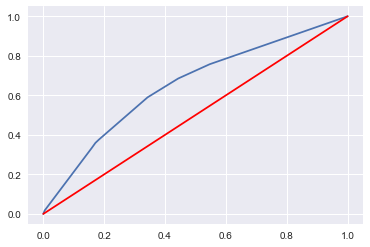

In [37]:
dtrscv40 = DecisionTreeClassifier(**rand_search.best_params_)

model_compare(dtrscv40, X_train, X_test, y_train, y_test)

1: For first try based on these params = {'max_depth': sp_randint(3,40), 
          'min_samples_split': sp_randint(2,37), 
          'min_samples_leaf': sp_randint(2,35), 
          'criterion': ['gini', 'entropy']} we get best parameters like {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 17, 'min_samples_split': 2} and based on that we get the roc auc score on train and test 73 & 67 respectively but it is clearly overfitting so we have to tune it to improve the model performance.

2: For second try based on these params = {'max_depth': sp_randint(3,37), 
          'min_samples_split': sp_randint(2,35), 
          'min_samples_leaf': sp_randint(2,33), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 17, 'min_samples_split': 2} and based on that we get the roc auc score on train and test of 73 & 67.

3: For third try based on these params = {'max_depth': sp_randint(3,35), 
          'min_samples_split': sp_randint(2,33), 
          'min_samples_leaf': sp_randint(2,30), 
          'criterion': ['gini', 'entropy']} we get best parameters like {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 22} and based on that we get the roc auc score on train and test is 73 & 67 respectively.

4: For fourth try based on these params = {'max_depth': sp_randint(3,30), 
          'min_samples_split': sp_randint(2,27), 
          'min_samples_leaf': sp_randint(2,25), 
          'criterion': ['gini', 'entropy']} we get best parameters like {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 18, 'min_samples_split': 3} and based on that we get roc auc score on train and test is 65 and 64.

5: For fifth try based on these params = {'max_depth': sp_randint(3,27), 
          'min_samples_split': sp_randint(2,25), 
          'min_samples_leaf': sp_randint(2,23), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 18, 'min_samples_split': 3} and based on that we get the roc auc score on train and test is 65 & 64.

6: For sixth try based on these params = {'max_depth': sp_randint(3,20), 
          'min_samples_split': sp_randint(2,25), 
          'min_samples_leaf': sp_randint(2,17), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 19} and based on that we get the roc auc score on train and test is 67 & 66.

7: For seventh try based on these params = {'max_depth': sp_randint(3,17), 
          'min_samples_split': sp_randint(2,20), 
          'min_samples_leaf': sp_randint(2,15), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 7} and based on that we get the roc auc score on train and test is 69 and 67 respectively.

8: For eight try based on these params = {'max_depth': sp_randint(3,13), 
          'min_samples_split': sp_randint(2,15), 
          'min_samples_leaf': sp_randint(2,11), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 9} and based on that we get the roc auc score on train and test is 70 and 67 respectively.

9: For ninth try based on these params = {'max_depth': sp_randint(3,10), 
          'min_samples_split': sp_randint(2,11), 
          'min_samples_leaf': sp_randint(2,7), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 10} and based on that we get the roc auc score on train and test is 70 and 67 respectively.

10: For tenth try based on these params = {'max_depth': sp_randint(3,7), `
          'min_samples_split': sp_randint(2,5), 
          'min_samples_leaf': sp_randint(2,7), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3} and based on that we get the roc auc score on train and test is 70 and 67 respectively.

11: For elventh try based on these params = {'max_depth': sp_randint(3,5), 
          'min_samples_split': sp_randint(2,4), 
          'min_samples_leaf': sp_randint(2,5), 
          'criterion': ['gini', 'entropy']} we get the best parameters like {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2} and based on that we get the roc auc score on train and test is 65 and 64 respectively.

So for decision tree with 40 features we will go with 8,6,7 models

## Random Forest

In [38]:
rfc = RandomForestClassifier()

In [39]:
X = X_scaled
y = df['class']

Accuracy on Train Set: 
 0.9856216216216216


Accuracy on Test Set: 
 0.6164452665209349


Confusion Matrix for Train Set:
 [[13943    67]
 [  332 13408]]


Confusion Matrix for Test Set:
 [[4276 1796]
 [2766 3056]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14010
           1       1.00      0.98      0.99     13740

    accuracy                           0.99     27750
   macro avg       0.99      0.99      0.99     27750
weighted avg       0.99      0.99      0.99     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65      6072
           1       0.63      0.52      0.57      5822

    accuracy                           0.62     11894
   macro avg       0.62      0.61      0.61     11894
weighted avg       0.62      0.62      0.61     11894



ROC AUC on Train Set:
 0.9990827408577986


ROC A

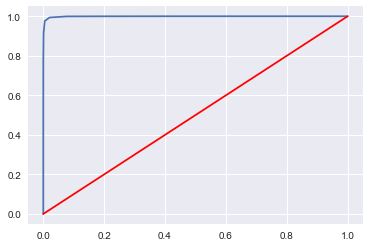



ROC AUC Curve for Test Set:




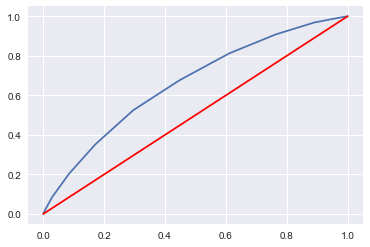

In [40]:
model_compare(rfc, X_train, X_test, y_train, y_test)

From the above results we can clearly see that our base model for random forest is overfitting so we have to tune the paramerters for Random Forest

## Hyper-Parameter Tunning for Random Forest

In [41]:
from scipy.stats import randint as sp_randint

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
rfrscvall = RandomForestClassifier(random_state = 0)

params = {'n_estimators': sp_randint(3,12), 
          'criterion': ['gini', 'entropy'], 
          'max_depth': sp_randint(3,15), 
          'min_samples_split': sp_randint(2,13),
          'min_samples_leaf': sp_randint(2,11)}

rand_search = RandomizedSearchCV(rfrscvall, param_distributions = params, cv = 5, random_state = 0)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 10}


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Accuracy on Train Set: 
 0.6695135135135135


Accuracy on Test Set: 
 0.6422565999663696


Confusion Matrix for Train Set:
 [[9606 4404]
 [4767 8973]]


Confusion Matrix for Test Set:
 [[4008 2064]
 [2191 3631]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68     14010
           1       0.67      0.65      0.66     13740

    accuracy                           0.67     27750
   macro avg       0.67      0.67      0.67     27750
weighted avg       0.67      0.67      0.67     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.65      0.66      0.65      6072
           1       0.64      0.62      0.63      5822

    accuracy                           0.64     11894
   macro avg       0.64      0.64      0.64     11894
weighted avg       0.64      0.64      0.64     11894



ROC AUC on Train Set:
 0.7305484853301916


ROC AUC o

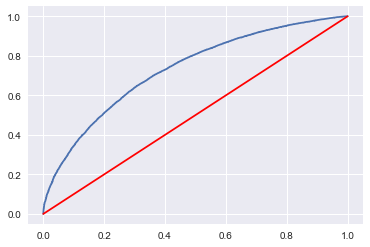



ROC AUC Curve for Test Set:




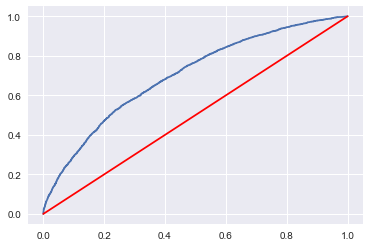

In [45]:
rfrscvall = RandomForestClassifier(**rand_search.best_params_)
model_compare(rfrscvall, X_train, X_test, y_train, y_test)

## With All features

1: for first try with these params ={'n_estimators': sp_randint(5,58),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,57), 
         'min_samples_split': sp_randint(2,55),
         'min_samples_leaf': sp_randint(2,53)}
 we get this parameters like {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 37, 'min_samples_split': 26, 'n_estimators': 54} and based on that we get the roc auc score on train and test is 81 & 71 respectively.

2: for second try with these params ={'n_estimators': sp_randint(3,50),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,55), 
         'min_samples_split': sp_randint(2,47),
         'min_samples_leaf': sp_randint(2,45)} we get this parameters like {'criterion': 'entropy', 'max_depth': 34, 'min_samples_leaf': 33, 'min_samples_split': 12, 'n_estimators': 26} and based on that we get the roc auc score on train and test is 82 & 71 respectively.

3: for third try with these params = {'n_estimators': sp_randint(3,45),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,50), 
         'min_samples_split': sp_randint(2,40),
         'min_samples_leaf': sp_randint(2,43)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 21, 'min_samples_split': 23, 'n_estimators': 39} and based on that we get roc auc score on train and test is 81 & 71.

4: For fourth try based on these params = {'n_estimators': sp_randint(3,35),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,37), 
         'min_samples_split': sp_randint(2,33),
         'min_samples_leaf': sp_randint(2,35)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 34, 'min_samples_leaf': 33, 'min_samples_split': 12, 'n_estimators': 23} and based on that we get roc auc score on train and test is 81 & 71

5: For fifth try based on these params = {'n_estimators': sp_randint(3,30),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,35), 
         'min_samples_split': sp_randint(2,30),
         'min_samples_leaf': sp_randint(2,33)} we get the best parameters like {'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 19, 'min_samples_split': 7, 'n_estimators': 28} and based on that we get the roc auc score on train and test is 86 & 71.

6: For sixth try based on these params = {'n_estimators': sp_randint(3,25),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,30), 
         'min_samples_split': sp_randint(2,27),
         'min_samples_leaf': sp_randint(2,29)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 26, 'min_samples_leaf': 19, 'min_samples_split': 21, 'n_estimators': 22} and based on that we get roc auc score on train and test is 87 & 71.

7: For seventh try based on these params = {'n_estimators': sp_randint(3,20),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,25), 
         'min_samples_split': sp_randint(2,23),
         'min_samples_leaf': sp_randint(2,25)} we get the best parameters like {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 21, 'n_estimators': 17} and based on that we get roc auc score on train and test is 73 & 70.

8: For eight try based on these params = {'n_estimators': sp_randint(3,17),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,20), 
         'min_samples_split': sp_randint(2,19),
         'min_samples_leaf': sp_randint(2,21)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 19, 'min_samples_split': 7, 'n_estimators': 12} and based on that we get the roc auc score on train and test is 85 & 70.

9: For ninth try based on these 
params = {'n_estimators': sp_randint(3,15),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,17), 
         'min_samples_split': sp_randint(2,15),
         'min_samples_leaf': sp_randint(2,17)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 12} and based on that we get roc auc score on train and test is 83 & 70.

10: For tenth try based on these params = {'n_estimators': sp_randint(3,12),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,15), 
         'min_samples_split': sp_randint(2,13),
         'min_samples_leaf': sp_randint(2,11)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 10} and based on that we get roc auc score on train and test is 73 & 70.

11: For eleventh try based on these params = {'n_estimators': sp_randint(3,10),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,13), 
         'min_samples_split': sp_randint(2,11),
         'min_samples_leaf': sp_randint(2,9)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 8} and based on that we get roc auc score on train and test is 81 & 70. 

12: For twevelth try based on these params = {'n_estimators': sp_randint(3,7),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,11), 
         'min_samples_split': sp_randint(2,9),
         'min_samples_leaf': sp_randint(2,7)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 6} and based on that we get roc auc score on train and test is 81 & 69.

13: For thirteen try based on these params = {'n_estimators': sp_randint(3,5),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,9), 
         'min_samples_split': sp_randint(2,7),
         'min_samples_leaf': sp_randint(2,5)} we get the best parameters like {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 4} and based on that we get roc auc score on train and test is 76 & 69.

14: For fourteen try based on these params = {'n_estimators': sp_randint(3,15),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,7), 
         'min_samples_split': sp_randint(2,10),
         'min_samples_leaf': sp_randint(2,9)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 10} and based on that we get roc auc score on train and test is 73 & 69.


15: For fifteenth try based on these params = {'n_estimators': sp_randint(3,13),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(3,10), 
         'min_samples_split': sp_randint(2,15),
         'min_samples_leaf': sp_randint(2,11)}
 we get the best parameters like {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 11, 'n_estimators': 7} and based on that we get roc auc score on train and test is 75 & 70.

After analysing all the results we conclude that for random forest with all features we consider model no 10 which has roc auc score of 73 & 70.

## Feature Selection and Model Tunning

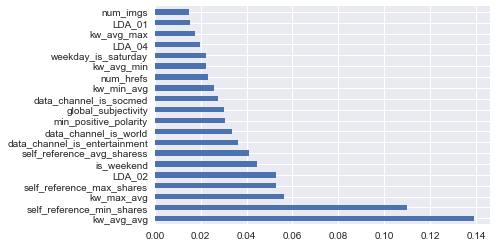

In [46]:
feat_importances = pd.Series(rfrscvall.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [47]:
# Reorder by importance
feat_importances = feat_importances.sort_values(ascending = False)

In [48]:
# Converting to Data Frame
important_features = feat_importances.to_frame()

In [49]:
# First 20 Important Features
important_features[0:20].index

Index(['kw_avg_avg', 'self_reference_min_shares', 'kw_max_avg',
       'self_reference_max_shares', 'LDA_02', 'is_weekend',
       'self_reference_avg_sharess', 'data_channel_is_entertainment',
       'data_channel_is_world', 'min_positive_polarity', 'global_subjectivity',
       'data_channel_is_socmed', 'kw_min_avg', 'num_hrefs', 'kw_avg_min',
       'weekday_is_saturday', 'LDA_04', 'kw_avg_max', 'LDA_01', 'num_imgs'],
      dtype='object')

## Random Forest with 20 most important Features without Hyperparameter tunning

In [50]:
X = X_scaled[['kw_avg_avg', 'kw_max_avg', 'data_channel_is_entertainment',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_02',
       'self_reference_min_shares', 'self_reference_max_shares',
       'data_channel_is_world', 'LDA_04', 'kw_min_avg',
       'data_channel_is_socmed', 'rate_negative_words', 'LDA_01', 'LDA_00',
       'weekday_is_saturday', 'num_hrefs', 'kw_min_min',
       'n_non_stop_unique_tokens', 'data_channel_is_tech']]

y = df['class']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Random Forest with hyper-parameter tunning and 20 Most Important Features

In [52]:
rfrscv20 = RandomForestClassifier(random_state = 0)

params = {'n_estimators': sp_randint(3,5),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,5), 
         'min_samples_split': sp_randint(2,5),
         'min_samples_leaf': sp_randint(2,7)}

rand_search = RandomizedSearchCV(rfrscv20, param_distributions = params, cv = 5, random_state = 0)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 4}


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Accuracy on Train Set: 
 0.640936936936937


Accuracy on Test Set: 
 0.6364553556414999


Confusion Matrix for Train Set:
 [[8906 5104]
 [4860 8880]]


Confusion Matrix for Test Set:
 [[3815 2257]
 [2067 3755]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.65      0.64      0.64     14010
           1       0.64      0.65      0.64     13740

    accuracy                           0.64     27750
   macro avg       0.64      0.64      0.64     27750
weighted avg       0.64      0.64      0.64     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      6072
           1       0.62      0.64      0.63      5822

    accuracy                           0.64     11894
   macro avg       0.64      0.64      0.64     11894
weighted avg       0.64      0.64      0.64     11894



ROC AUC on Train Set:
 0.6941159776703478


ROC AUC on

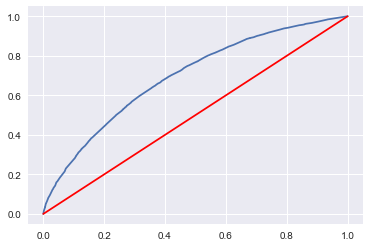



ROC AUC Curve for Test Set:




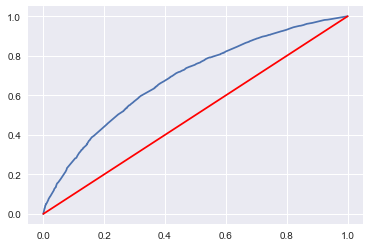

In [54]:
rfrscv20 = RandomForestClassifier(**rand_search.best_params_)
model_compare(rfrscv20, X_train, X_test, y_train, y_test)

1.for first try with these params = {'n_estimators': sp_randint(3,20),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,20), 
         'min_samples_split': sp_randint(2,17),
         'min_samples_leaf': sp_randint(2,19)} we get the best parameters like {'criterion': 'gini', 'max_depth':7,'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 18} and based on that we get roc auc score on train & test 74 & 70.

2.For second try with these params = {'n_estimators': sp_randint(3,15),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,17), 
         'min_samples_split': sp_randint(2,15),
         'min_samples_leaf': sp_randint(2,13)} we get the best parameters like {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 14} and based on that we get roc auc score on train and test is 74 & 70.

3.For third try with these params = {'n_estimators': sp_randint(3,13),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,15), 
         'min_samples_split': sp_randint(2,12),
         'min_samples_leaf': sp_randint(2,11)} we get the best parameters like {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 11} and based on that we get roc auc score on train and test is 77 & 70.

4.For fourth try with these params = {'n_estimators': sp_randint(3,10),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,11), 
         'min_samples_split': sp_randint(2,9),
         'min_samples_leaf': sp_randint(2,7)} we get the best parameters like {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 8} and based on that we get the roc auc score on train and test is 77 & 70.

5 For fifth try with these params = {'n_estimators': sp_randint(3,9),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,10), 
         'min_samples_split': sp_randint(2,10),
         'min_samples_leaf': sp_randint(2,11)} we get this best parameters like {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 7} and based on that we get roc auc score on train and test 73 & 70.

6 For sixth try with these params = {'n_estimators': sp_randint(3,7),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,9), 
         'min_samples_split': sp_randint(2,5),
         'min_samples_leaf': sp_randint(2,10)} we get this best parameters like {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 6} and based on that we get roc auc score on train and test 73 & 69.

7: For seventh try with these params = {'n_estimators': sp_randint(3,5),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,5), 
         'min_samples_split': sp_randint(2,5),
         'min_samples_leaf': sp_randint(2,7)} we get this parameters like {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 4} and we get roc auc score on train and test 69 & 68.

So our final model with 20 features we will go with 5 & 7 model respectively.

## Now Let build Random Forest with 30 Most Important Features without hyperparameter tunning

In [55]:
# First 30 Important Features
important_features[0:30].index

Index(['kw_avg_avg', 'self_reference_min_shares', 'kw_max_avg',
       'self_reference_max_shares', 'LDA_02', 'is_weekend',
       'self_reference_avg_sharess', 'data_channel_is_entertainment',
       'data_channel_is_world', 'min_positive_polarity', 'global_subjectivity',
       'data_channel_is_socmed', 'kw_min_avg', 'num_hrefs', 'kw_avg_min',
       'weekday_is_saturday', 'LDA_04', 'kw_avg_max', 'LDA_01', 'num_imgs',
       'n_tokens_content', 'n_non_stop_unique_tokens',
       'global_sentiment_polarity', 'LDA_03', 'weekday_is_sunday', 'LDA_00',
       'data_channel_is_tech', 'n_unique_tokens', 'kw_max_min', 'kw_max_max'],
      dtype='object')

In [56]:
X = X_scaled[['kw_avg_avg', 'kw_max_avg', 'data_channel_is_entertainment',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_02',
       'self_reference_min_shares', 'self_reference_max_shares',
       'data_channel_is_world', 'LDA_04', 'kw_min_avg',
       'data_channel_is_socmed', 'rate_negative_words', 'LDA_01', 'LDA_00',
       'weekday_is_saturday', 'num_hrefs', 'kw_min_min',
       'n_non_stop_unique_tokens', 'data_channel_is_tech',
       'global_subjectivity', 'n_unique_tokens', 'kw_avg_min',
       'min_positive_polarity', 'n_tokens_content', 'LDA_03', 'kw_min_max',
       'kw_max_max', 'num_imgs', 'kw_avg_max']]

y = df['class']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Random forest with 30 most important fetures and hyper-parameter tunning on top of it

In [58]:
rfrscv30 = RandomForestClassifier(random_state = 0)

params = {'n_estimators': sp_randint(3,30), 
          'criterion': ['gini', 'entropy'], 
          'max_depth': sp_randint(2,27), 
          'min_samples_split': sp_randint(2,25), 
          'min_samples_leaf': sp_randint(2,29)}

rand_search = RandomizedSearchCV(rfrscv30, param_distributions = params, cv = 5, random_state = 0)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 22}


Accuracy on Train Set: 
 0.6618018018018018


Accuracy on Test Set: 
 0.646964856230032


Confusion Matrix for Train Set:
 [[9167 4843]
 [4542 9198]]


Confusion Matrix for Test Set:
 [[3872 2200]
 [1999 3823]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66     14010
           1       0.66      0.67      0.66     13740

    accuracy                           0.66     27750
   macro avg       0.66      0.66      0.66     27750
weighted avg       0.66      0.66      0.66     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65      6072
           1       0.63      0.66      0.65      5822

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



ROC AUC on Train Set:
 0.7224998519460523


ROC AUC on

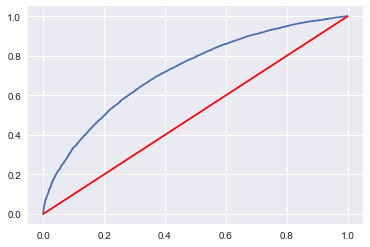



ROC AUC Curve for Test Set:




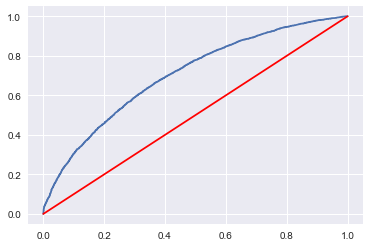

In [59]:
rfrscv30 = RandomForestClassifier(**rand_search.best_params_)
model_compare(rfrscv30, X_train, X_test, y_train, y_test)

1: For first try with these params = {'n_estimators': sp_randint(3,30),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,27), 
         'min_samples_split': sp_randint(2,25),
         'min_samples_leaf': sp_randint(2,29)} we get these best parameters like {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 22} and based on that we get roc auc score on train and test 72 and 70 respectively.
 

2: For second try with these params = {'n_estimators': sp_randint(3,25),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,23), 
         'min_samples_split': sp_randint(2,22),
         'min_samples_leaf': sp_randint(2,25)} we get these best parameters {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 21, 'min_samples_split': 21, 'n_estimators': 22} and we get roc auc score on train and test are 84 and 71 respectively.


3: For Third try with these params = params = {'n_estimators': sp_randint(3,20),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,19), 
         'min_samples_split': sp_randint(2,21),
         'min_samples_leaf': sp_randint(2,21)} we get these best parameters {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 18} and we get roc auc score on train and tes are 80 and 71 respectively.

4: For Fourth try with these params = {'n_estimators': sp_randint(3,17),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,17), 
         'min_samples_split': sp_randint(2,19),
         'min_samples_leaf': sp_randint(2,19)}
 we get these best parameters {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 11} and we get roc auc score on train and tes are 73 and 70 respectively.

5: For Fifth try with these params = {'n_estimators': sp_randint(3,15),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,15), 
         'min_samples_split': sp_randint(2,17),
         'min_samples_leaf': sp_randint(2,17)}
 we get these best parameters {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 11} and we get roc auc score on train and tes are 73 and 70 respectively

6: For Sixth try with these params = {'n_estimators': sp_randint(3,13),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,11), 
         'min_samples_split': sp_randint(2,15),
         'min_samples_leaf': sp_randint(2,15)} we get these best parameters {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 12} and we get roc auc score on train and test are 79 and 70 respectively.

7: For Seventh try with these params = {'n_estimators': sp_randint(3,11),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,10), 
         'min_samples_split': sp_randint(2,13),
         'min_samples_leaf': sp_randint(2,11)}
    we get these best parameters {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 9} and we get roc auc score on train and tes are 70 and 69 respectively.

8: For Eight try with these params = params = {'n_estimators': sp_randint(3,7),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,5), 
         'min_samples_split': sp_randint(2,9),
         'min_samples_leaf': sp_randint(2,7)} we get best parameters {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 3} and we get roc auc score on train and test 69 and 68 respectively.

So for random forest with 30 features we will go with 8,7, & 1 model.

## Now Trying with 40 most important features without Hyper-parameter tunning

In [60]:
# First 40 Important Features
important_features[0:40].index

Index(['kw_avg_avg', 'self_reference_min_shares', 'kw_max_avg',
       'self_reference_max_shares', 'LDA_02', 'is_weekend',
       'self_reference_avg_sharess', 'data_channel_is_entertainment',
       'data_channel_is_world', 'min_positive_polarity', 'global_subjectivity',
       'data_channel_is_socmed', 'kw_min_avg', 'num_hrefs', 'kw_avg_min',
       'weekday_is_saturday', 'LDA_04', 'kw_avg_max', 'LDA_01', 'num_imgs',
       'n_tokens_content', 'n_non_stop_unique_tokens',
       'global_sentiment_polarity', 'LDA_03', 'weekday_is_sunday', 'LDA_00',
       'data_channel_is_tech', 'n_unique_tokens', 'kw_max_min', 'kw_max_max',
       'global_rate_positive_words', 'average_token_length',
       'title_sentiment_polarity', 'global_rate_negative_words',
       'num_self_hrefs', 'num_keywords', 'kw_min_max', 'avg_negative_polarity',
       'kw_min_min', 'n_tokens_title'],
      dtype='object')

In [61]:
X = X_scaled[['kw_avg_avg', 'kw_max_avg', 'data_channel_is_entertainment',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_02',
       'self_reference_min_shares', 'self_reference_max_shares',
       'data_channel_is_world', 'LDA_04', 'kw_min_avg',
       'data_channel_is_socmed', 'rate_negative_words', 'LDA_01', 'LDA_00',
       'weekday_is_saturday', 'num_hrefs', 'kw_min_min',
       'n_non_stop_unique_tokens', 'data_channel_is_tech',
       'global_subjectivity', 'n_unique_tokens', 'kw_avg_min',
       'min_positive_polarity', 'n_tokens_content', 'LDA_03', 'kw_min_max',
       'kw_max_max', 'num_imgs', 'kw_avg_max', 'average_token_length',
       'data_channel_is_bus', 'weekday_is_sunday',
       'global_rate_negative_words', 'global_sentiment_polarity', 'kw_max_min',
       'avg_negative_polarity', 'title_sentiment_polarity',
       'avg_positive_polarity', 'global_rate_positive_words']]

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Now tune the random Forest with 40 best features for improving model performance and reducing overfitting

In [62]:
rfrscv40 = RandomForestClassifier(random_state = 0)

params = {'n_estimators': sp_randint(3,9), 
          'criterion': ['gini', 'entropy'], 
          'max_depth': sp_randint(2,7), 
          'min_samples_split': sp_randint(2,9), 
          'min_samples_leaf': sp_randint(2,7)}

rand_search = RandomizedSearchCV(rfrscv40, param_distributions = params, cv = 5, random_state = 0)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 6}


Accuracy on Train Set: 
 0.6534774774774775


Accuracy on Test Set: 
 0.6451992601311586


Confusion Matrix for Train Set:
 [[8911 5099]
 [4517 9223]]


Confusion Matrix for Test Set:
 [[3812 2260]
 [1960 3862]]


Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65     14010
           1       0.64      0.67      0.66     13740

    accuracy                           0.65     27750
   macro avg       0.65      0.65      0.65     27750
weighted avg       0.65      0.65      0.65     27750



Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64      6072
           1       0.63      0.66      0.65      5822

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



ROC AUC on Train Set:
 0.7113320673422082


ROC AUC o

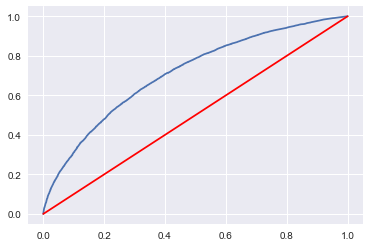



ROC AUC Curve for Test Set:




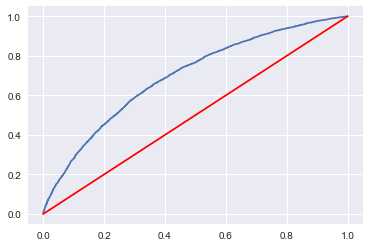

In [63]:
rfrscv40 = RandomForestClassifier(**rand_search.best_params_)
model_compare(rfrscv40, X_train, X_test, y_train, y_test)

1: For first try based on these params = params = {'n_estimators': sp_randint(3,40),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,37), 
         'min_samples_split': sp_randint(2,35),
         'min_samples_leaf': sp_randint(2,37)} we get these best parameters {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 25, 'min_samples_split': 13, 'n_estimators': 31} and based on this we get roc auc score on train and test 81 & 71 respectively. 

2: For second try based on these params = {'n_estimators': sp_randint(3,35),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,33), 
         'min_samples_split': sp_randint(2,30),
         'min_samples_leaf': sp_randint(2,33)} we get these best parameters {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 25, 'min_samples_split': 16, 'n_estimators': 27} and based on that we get roc auc score on train and test 77 and 71 respectively.

3: For third try based on these params = {'n_estimators': sp_randint(3,30),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,27), 
         'min_samples_split': sp_randint(2,25),
         'min_samples_leaf': sp_randint(2,27)} we get these best parameters {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 21, 'min_samples_split': 21, 'n_estimators': 17} and based on that we get roc auc score on train and test 85 & 71 respectively.

4: For fourth try based on these params = {'n_estimators': sp_randint(3,27),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,25), 
         'min_samples_split': sp_randint(2,23),
         'min_samples_leaf': sp_randint(2,25)} we get these best parameters {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 17, 'min_samples_split': 2, 'n_estimators': 21} and based on that we get roc auc score on train and test 87 & 71.

5: For fifth try based on these params = {'n_estimators': sp_randint(3,25),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,23), 
         'min_samples_split': sp_randint(2,21),
         'min_samples_leaf': sp_randint(2,23)}
 we get these best parameters {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 22, 'min_samples_split': 18, 'n_estimators': 22} and based on that we get roc auc score on train and test 80 & 71 which is also overfitted.

6: For sixth try based on these params = {'n_estimators': sp_randint(3,23),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,21), 
         'min_samples_split': sp_randint(2,19),
         'min_samples_leaf': sp_randint(2,21)} we get these best parameters {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 20} and based on that we get roc auc score on train and test 75 & 70.

7: For seventh try based on these params = {'n_estimators': sp_randint(3,21),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,19), 
         'min_samples_split': sp_randint(2,17),
         'min_samples_leaf': sp_randint(2,19)} we get these best parameters {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 20} and based on that we get roc auc score on train and test 75 & 70 respectively.

8: For eight try based on these params = {'n_estimators': sp_randint(3,17),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,15), 
         'min_samples_split': sp_randint(2,13),
         'min_samples_leaf': sp_randint(2,15)}
 we get these best parameters {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 14} and based on that we get roc auc score on train and test 75 and 71 respectively.

9: For ninth try based on these params = {'n_estimators': sp_randint(3,10),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,10), 
         'min_samples_split': sp_randint(2,9),
         'min_samples_leaf': sp_randint(2,10)} we get these best parameters {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 9} and based on that we get roc auc score on train and test 73 and 70 respectively.

10: For tenth try based on these params = {'n_estimators': sp_randint(3,9),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,7), 
         'min_samples_split': sp_randint(2,9),
         'min_samples_leaf': sp_randint(2,7)} we get these best parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 6} and based on that we get roc auc score on train and test 71 and 69 respectively.

11: For eleventh try based on these params = {'n_estimators': sp_randint(3,7),
         'criterion': ['gini', 'entropy'],
         'max_depth': sp_randint(2,5), 
         'min_samples_split': sp_randint(2,7),
         'min_samples_leaf': sp_randint(2,5)} we get these best parameters {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 5} and based on that we get roc auc score on train and test 69 and 68 respectively.

So for random Forest with 40 features we will go with 9,10, and 11 model.

## SVM

In [64]:
X = X_scaled

y = df['class']

In [65]:
from sklearn.svm import SVC

In [68]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

#A function which returns the corresponding SVC model

def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto", probability = True)
    
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto", probability = True)
    
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto", probability = True)
    
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto", probability = True)

In [69]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    
# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
    
# Make prediction
    y_prde_train = svclassifier.predict(X_train)
    y_pred_test = svclassifier.predict(X_test)
    
    y_prob_train = svclassifier.predict_proba(X_train)[:,1]
    y_prob_test = svclassifier.predict_proba(X_test)[:,1]
    
# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred_test))
    
    print('ROC AUC on Train Set:\n', roc_auc_score(y_train, y_prob_train))
    print('\n')
    print('ROC AUC on Test Set:\n', roc_auc_score(y_test, y_prob_test))
    print('\n')

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.55      0.90      0.68      6072
           1       0.69      0.23      0.34      5822

    accuracy                           0.57     11894
   macro avg       0.62      0.56      0.51     11894
weighted avg       0.62      0.57      0.52     11894

ROC AUC on Train Set:
 0.4995647733423932


ROC AUC on Test Set:
 0.4990627470921483


Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      6072
           1       0.64      0.64      0.64      5822

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894

ROC AUC on Train Set:
 0.7900434603272564


ROC AUC on Test Set:
 0.7095259100798434


Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.56      0.57    

## Hyper parameter tunning

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(probability = True),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=11.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.7min remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=12.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=10.2min
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..................... C=0.1, gamma=1, kernel=poly, total=224.5min
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..................... C=0.1, gamma=1, kernel=poly, total=213.8min
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..................... C=0.1, gamma=1, kernel=poly, total=273.3min
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total= 5.1min
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total= 5.1min
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .